In [1]:
import nltk

In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
print(len(messages))

5574


In [4]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [6]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
import pandas as pd

In [8]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names = ['label','message'])

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
messages['length'] = messages['message'].apply(len)

In [13]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='length', ylabel='Count'>

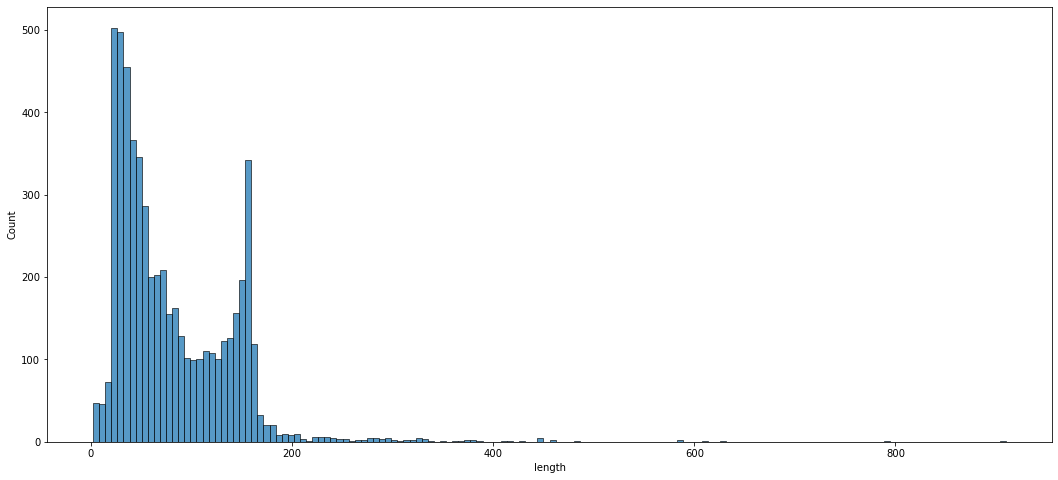

In [15]:
plt.figure(figsize = (18,8))
sns.histplot(x = 'length',data=messages,bins=150)

In [16]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [17]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

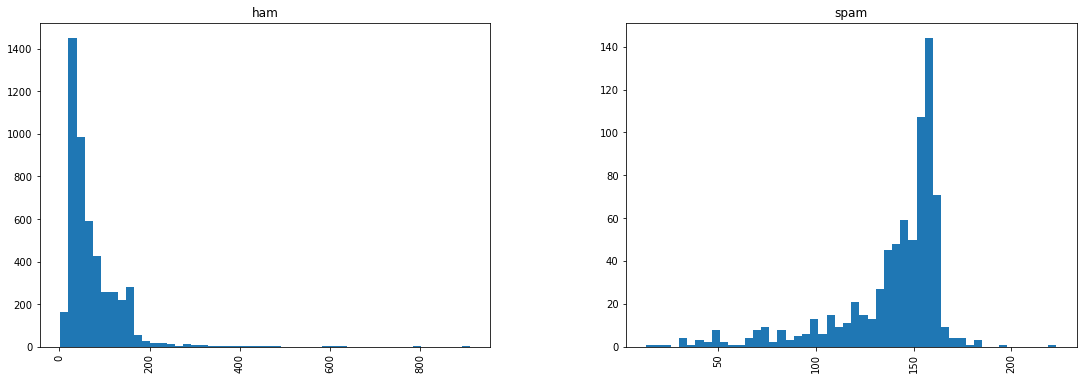

In [18]:
messages.hist(column='length',by='label',bins=50,figsize=(18,6))

In [19]:
#raw messages to bag of words that is vectors

In [20]:
import string

In [21]:
mess = 'Sample message! Notice: it has punctuation'

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
nopunctuation = [c for c in mess if c not in string.punctuation]

In [24]:
nopunctuation

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [25]:
from nltk.corpus import stopwords

In [26]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
#the below function takes the list to the string form

In [28]:
nopunctuation = ''.join(nopunctuation)

In [29]:
nopunctuation

'Sample message Notice it has punctuation'

In [30]:
nopunctuation.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [31]:
no_stopwords = [word for word in nopunctuation.split() if word.lower() not in stopwords.words('english')]

In [32]:
#stopwords are removed

In [33]:
no_stopwords

['Sample', 'message', 'Notice', 'punctuation']

In [34]:
#function for no punctutation and no stopwords

In [44]:
def text_process(mess):
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [45]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [47]:
#stemming is used to remove similar words like in a message running ran run and return a single word

In [48]:
#vectorization #raw messages to bag of words that is vectors

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [51]:
print(len(bow_transformer.vocabulary_))

11425


In [52]:
mess4 = messages['message'][3]

In [53]:
print(mess4)

U dun say so early hor... U c already then say...


In [55]:
bow4 = bow_transformer.transform([mess4])

In [58]:
print(bow4.shape)

(1, 11425)


In [59]:
#above is a small representation on how to convert message into vectors

In [60]:
message_bow = bow_transformer.transform(messages['message'])

In [63]:
print(message_bow)

  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1
  (1, 2451)	1
  (1, 3064)	1
  (1, 7701)	1
  (1, 8590)	1
  (1, 10698)	1
  (1, 11072)	1
  (2, 73)	1
  (2, 423)	1
  (2, 430)	1
  :	:
  (5568, 6691)	1
  (5568, 6882)	1
  (5568, 7159)	1
  (5568, 11418)	1
  (5569, 3228)	1
  (5569, 3721)	1
  (5569, 8252)	1
  (5569, 10199)	1
  (5570, 4508)	1
  (5570, 5055)	1
  (5570, 5251)	1
  (5570, 6282)	1
  (5570, 6699)	1
  (5570, 6799)	1
  (5570, 6984)	1
  (5570, 7287)	1
  (5570, 7394)	1
  (5570, 7800)	1
  (5570, 8420)	1
  (5570, 9915)	1
  (5570, 10787)	1
  (5570, 11006)	1
  (5571, 3431)	1
  (5571, 8348)	1
  (5571, 10648)	1


In [67]:
print('Shape of sparse matrix: ',message_bow.shape)

Shape of sparse matrix:  (5572, 11425)


In [68]:
#the below data represent the amount of non zero occurances 

In [69]:
message_bow.nnz

50548

In [70]:
#TFIDF is used below

In [71]:
from sklearn.feature_extraction.text import TfidfTransformer

In [74]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [76]:
tfidf4 = tfidf_transformer.transform(bow4)

In [81]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [82]:
#document frequency of word university is checked below

In [80]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [83]:
tfidf_message = tfidf_transformer.transform(message_bow)

In [85]:
print(tfidf_message)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

In [86]:
#we finally have messages represented as numerical vector

In [87]:
#we can train our our spam ham classifier, we can use any sort of classification algorithm to do this

In [88]:
#naive bayes classifier is used below

In [89]:
from sklearn.naive_bayes import MultinomialNB

In [91]:
spam_detect_model = MultinomialNB().fit(tfidf_message, messages['label'])

In [95]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [96]:
#above we predicted the message is spam or ham

In [94]:
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [100]:
all_predictions = spam_detect_model.predict(tfidf_message)

In [101]:
all_predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [103]:
#we should train our model after splitting into training and testing data set otherwise we cannot evaluate our model 
#other wise we won't be able to find true predicted power of our model

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

In [107]:
msg_train

5032     Hey... Very inconvenient for your sis a not huh?
4625    Jus finish blowing my hair. U finish dinner al...
4923    Hi Dear Call me its urgnt. I don't know whats ...
3486    No:-)i got rumour that you going to buy apartm...
5347    No sir. That's why i had an 8-hr trip on the b...
                              ...                        
4084    Good afternoon, my love. It was good to see yo...
1738    I cant pick the phone right now. Pls send a me...
3899             Otherwise had part time job na-tuition..
2663    Hello darling how are you today? I would love ...
4079                  Gam gone after outstanding innings.
Name: message, Length: 3900, dtype: object

In [108]:
from sklearn.pipeline import Pipeline

In [112]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    
    ])

In [113]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f7d71802040>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [121]:
predictions = pipeline.predict(msg_test)

In [119]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [126]:
print(confusion_matrix(label_test,predictions))

[[1447    0]
 [  83  142]]


In [128]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1447
        spam       1.00      0.63      0.77       225

    accuracy                           0.95      1672
   macro avg       0.97      0.82      0.87      1672
weighted avg       0.95      0.95      0.95      1672



In [130]:
print(accuracy_score(label_test,predictions))

0.9503588516746412


In [ ]:
#in real world the whole step is done through pipeline, not through the tedious process it is done above 
#to 